# **1. Perkenalan Dataset**


### **Penjelasan Singkat Dataset**
Dataset yang digunakan dalam proyek ini adalah **Bank Transaction Dataset for Fraud Detection** berasal dari sumber **Kaggle**. Untuk dataset yang digunakan memiliki 16 kolom, terdiri atas data *numerical* dan *categorical*. Dataset ini menggambarkan sejumlah pola transaksi keuangan yang berisikan 2.512 sampel data transaksi.

---

Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [34]:
df = pd.read_csv('https://raw.githubusercontent.com/rahmahff/projek_2/refs/heads/main/Bank%20Transactions%20Dataset/bank_transactions_data_2.csv')
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [35]:
# Memahami Struktur Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [36]:
# Mendeskripsikan Data Statistik untuk Semua Kolom
df.describe(include="all")

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2512,2512,2512.000000,2512,2512,2512,2512,2512,2512,2512,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512
unique,2512,495,NaN,2512,2,43,681,592,100,3,NaN,4,NaN,NaN,NaN,360
top,TX002496,AC00460,NaN,2023-04-03 16:07:53,Debit,Fort Worth,D000548,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,2024-11-04 08:09:17
freq,1,12,NaN,1,1944,70,9,13,45,868,NaN,657,NaN,NaN,NaN,16
mean,NaN,NaN,297.593778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.673965,NaN,119.643312,1.124602,5114.302966,NaN
std,NaN,NaN,291.946243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.792198,NaN,69.963757,0.602662,3900.942499,NaN
min,NaN,NaN,0.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,NaN
25%,NaN,NaN,81.885000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.370000,NaN
50%,NaN,NaN,211.140000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.500000,1.000000,4735.510000,NaN
75%,NaN,NaN,414.527500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7678.820000,NaN


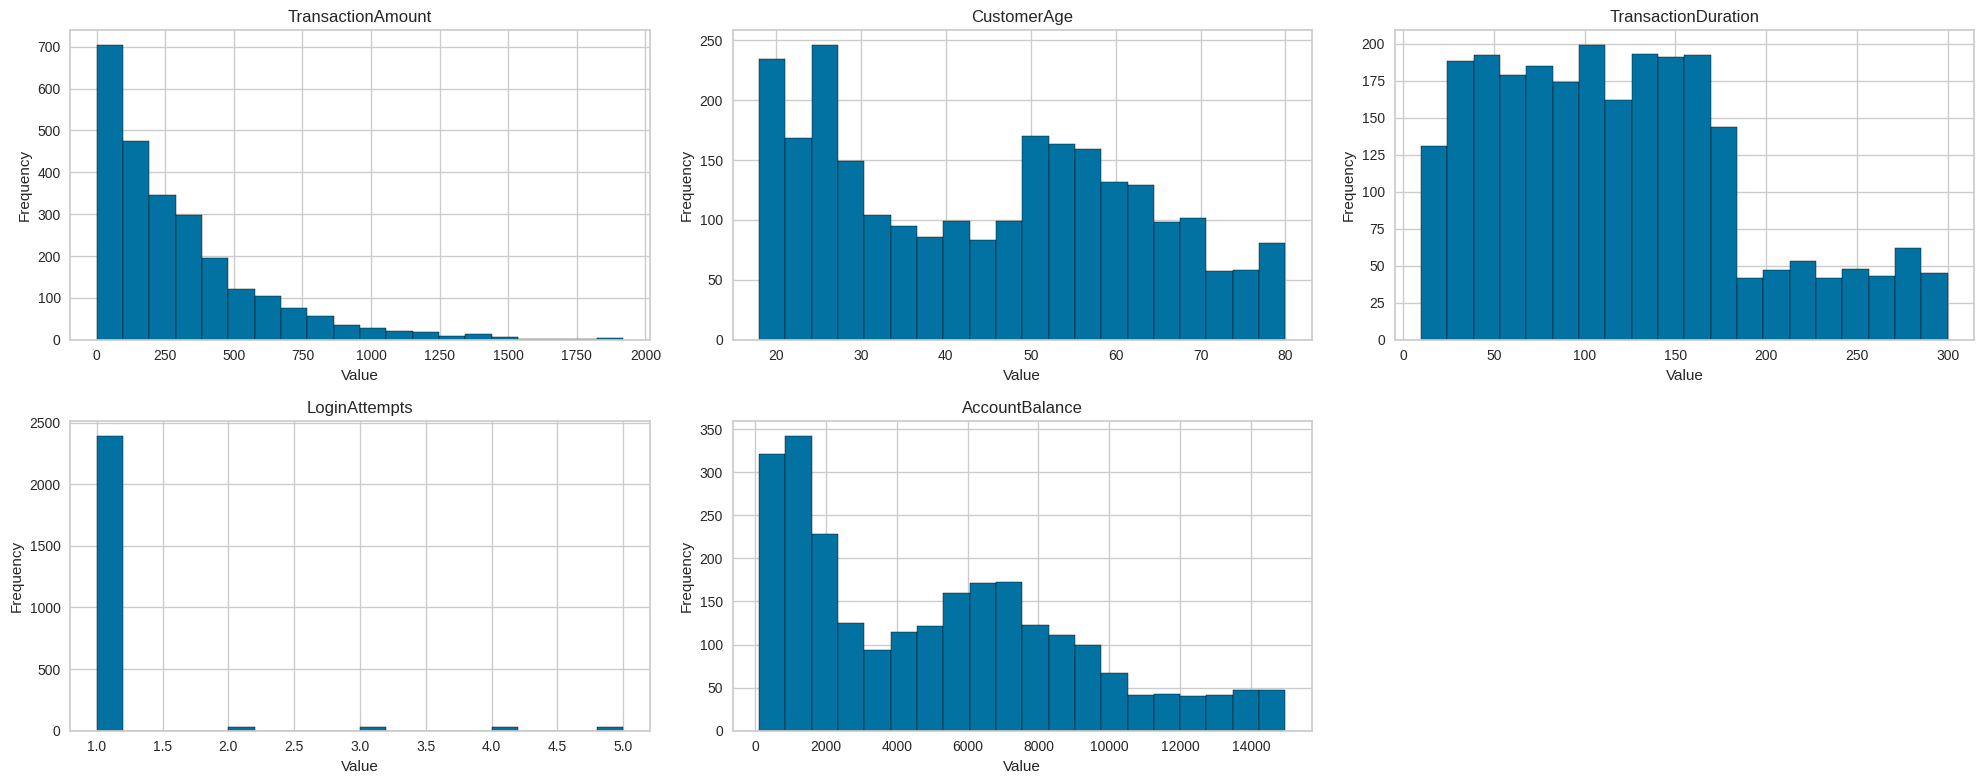

In [37]:
# Analisis Distribusi Variabel Numerik
columns_numerical = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
# Menentukan jumlah baris dan kolom untuk grid subplot
n_cols = 3  # Jumlah kolom yang diinginkan
n_rows = -(-len(columns_numerical) // n_cols)  # Ceiling division untuk menentukan jumlah baris

# Membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

# Flatten axes array untuk memudahkan iterasi jika diperlukan
axes = axes.flatten()

# Plot setiap variabel
for i, column in enumerate(columns_numerical):
    df[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Menghapus subplot yang tidak terpakai (jika ada)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Menyesuaikan layout agar lebih rapi
plt.tight_layout()
plt.show()

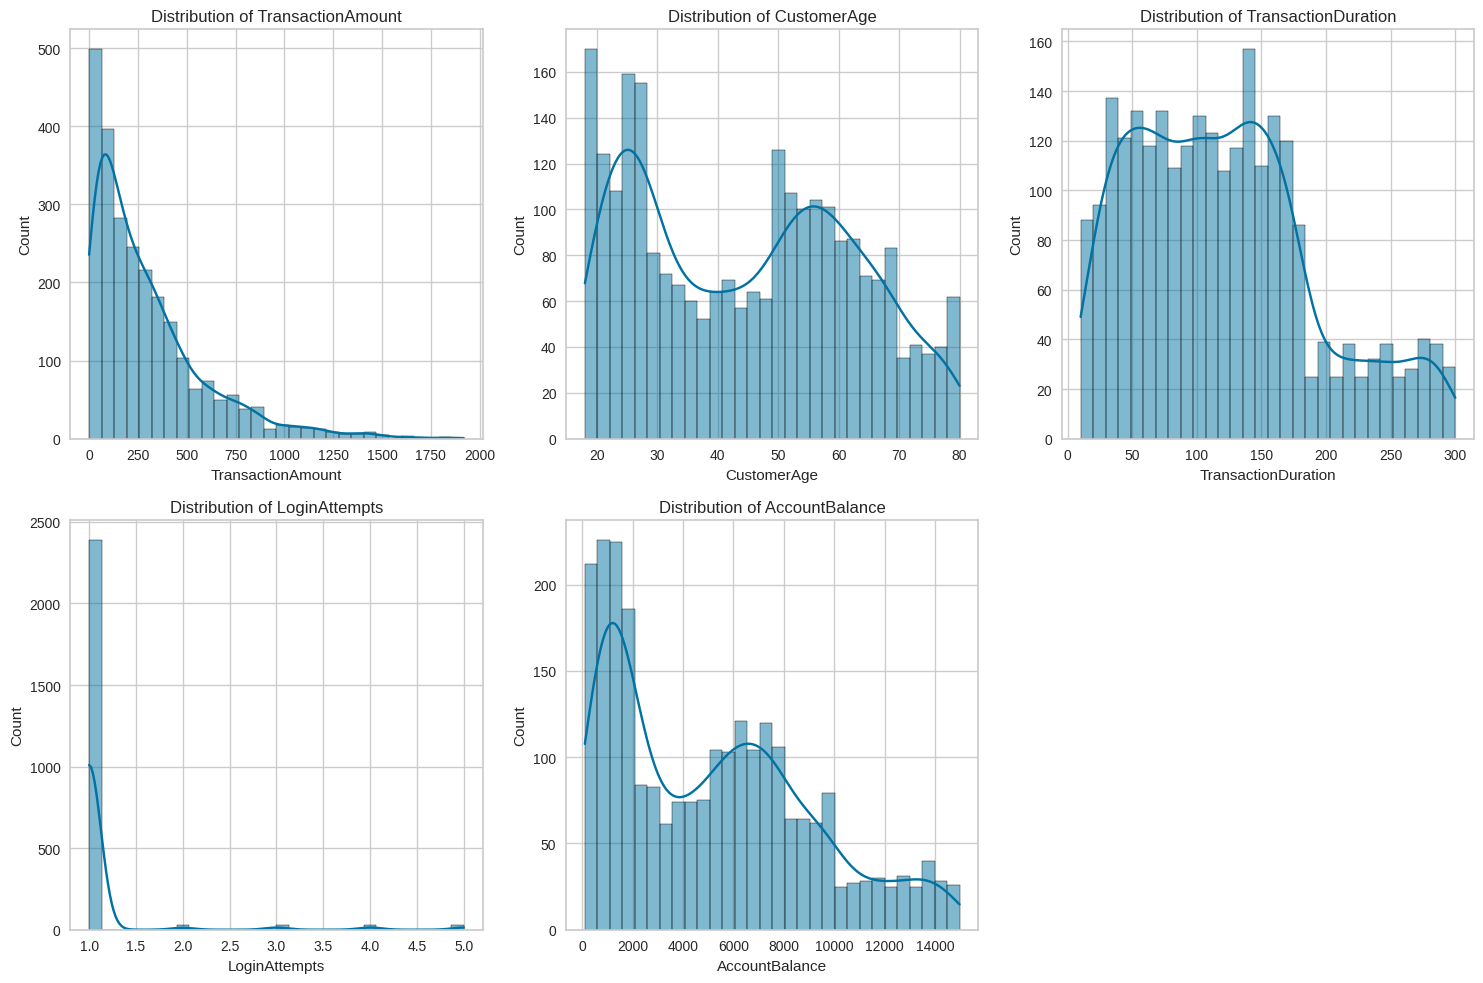

In [38]:
# Visualisasi distribusi data numerical untuk beberapa kolom
columns_to_plot = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

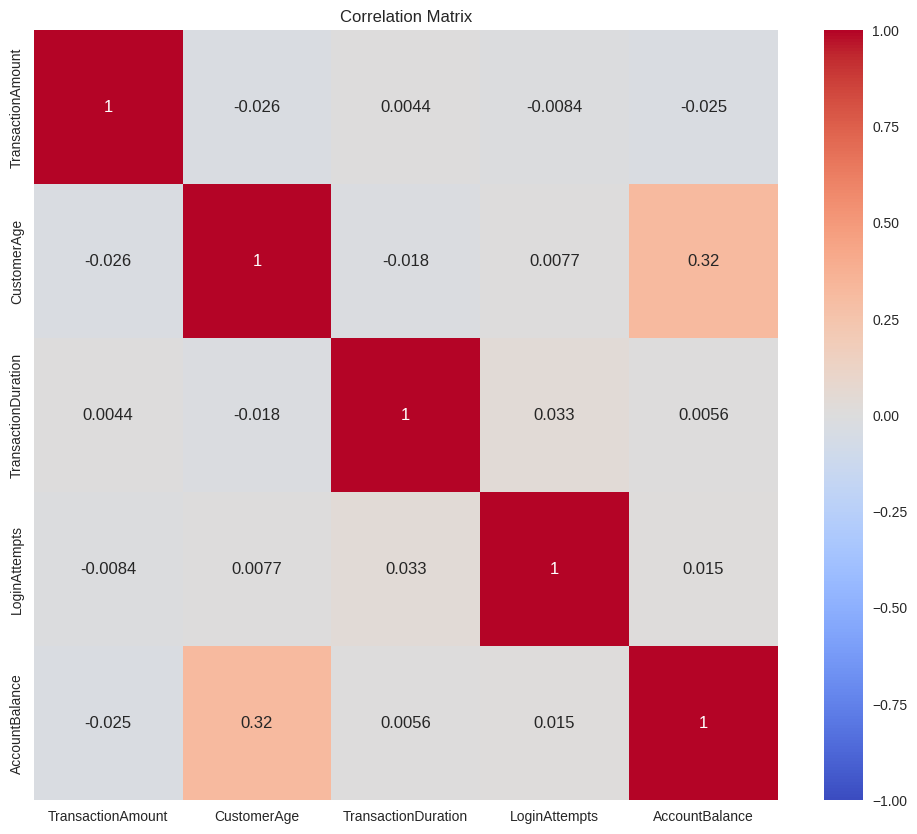

In [39]:
# Visualisasi korelasi antar variabel numerik
corr_numerical = df[['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']]
plt.figure(figsize=(12, 10))
correlation_matrix = corr_numerical.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

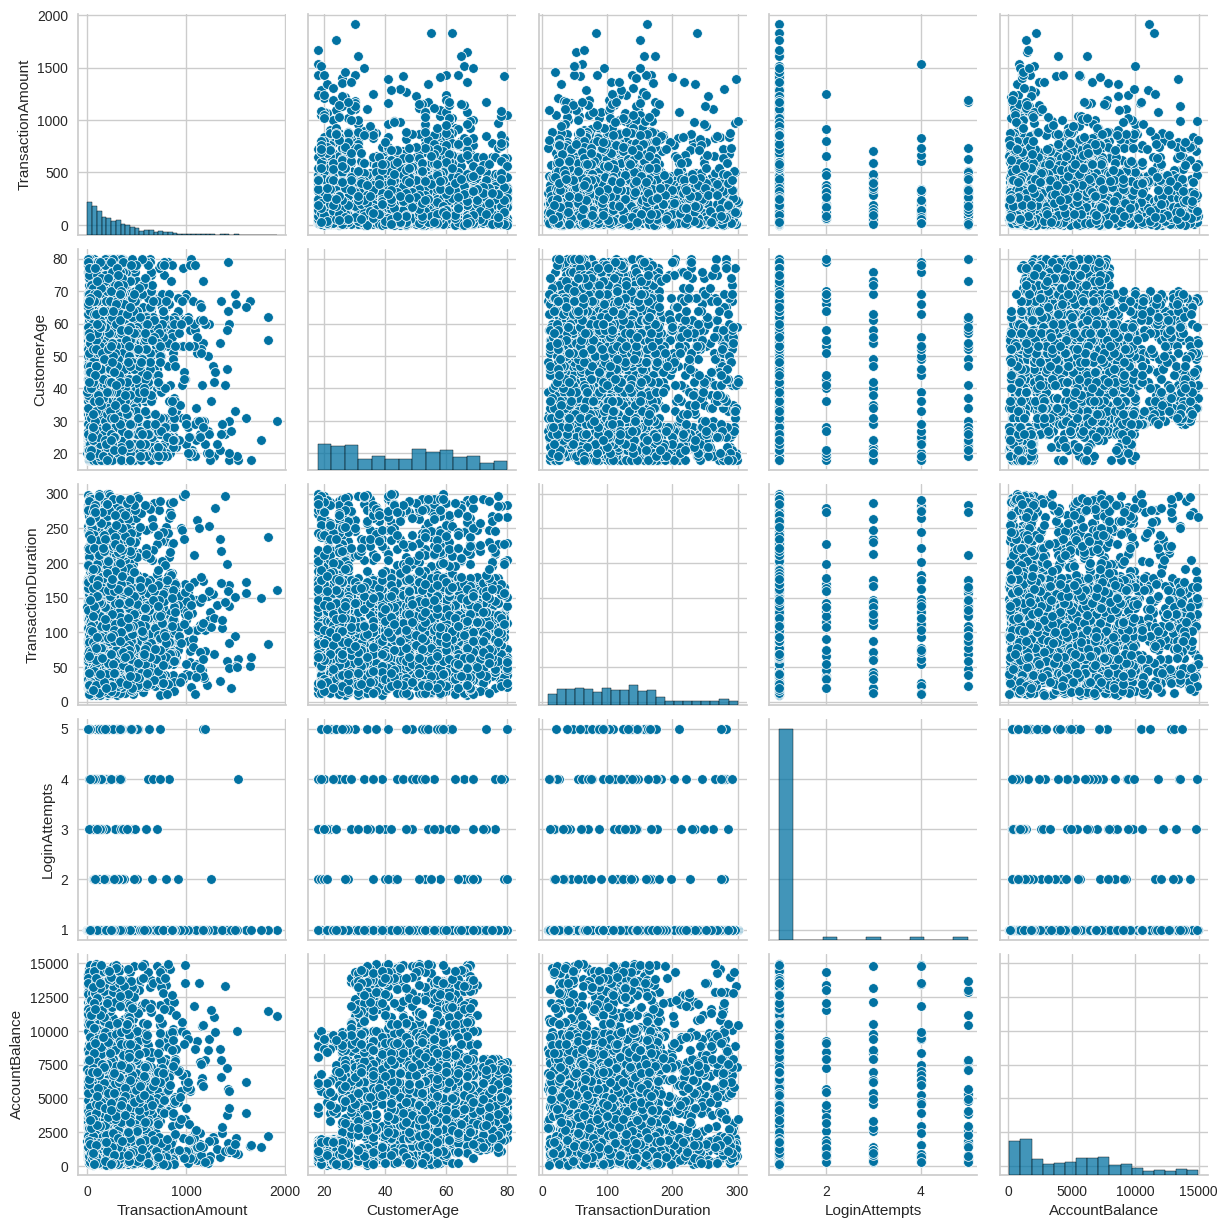

In [40]:
sns.pairplot(df)

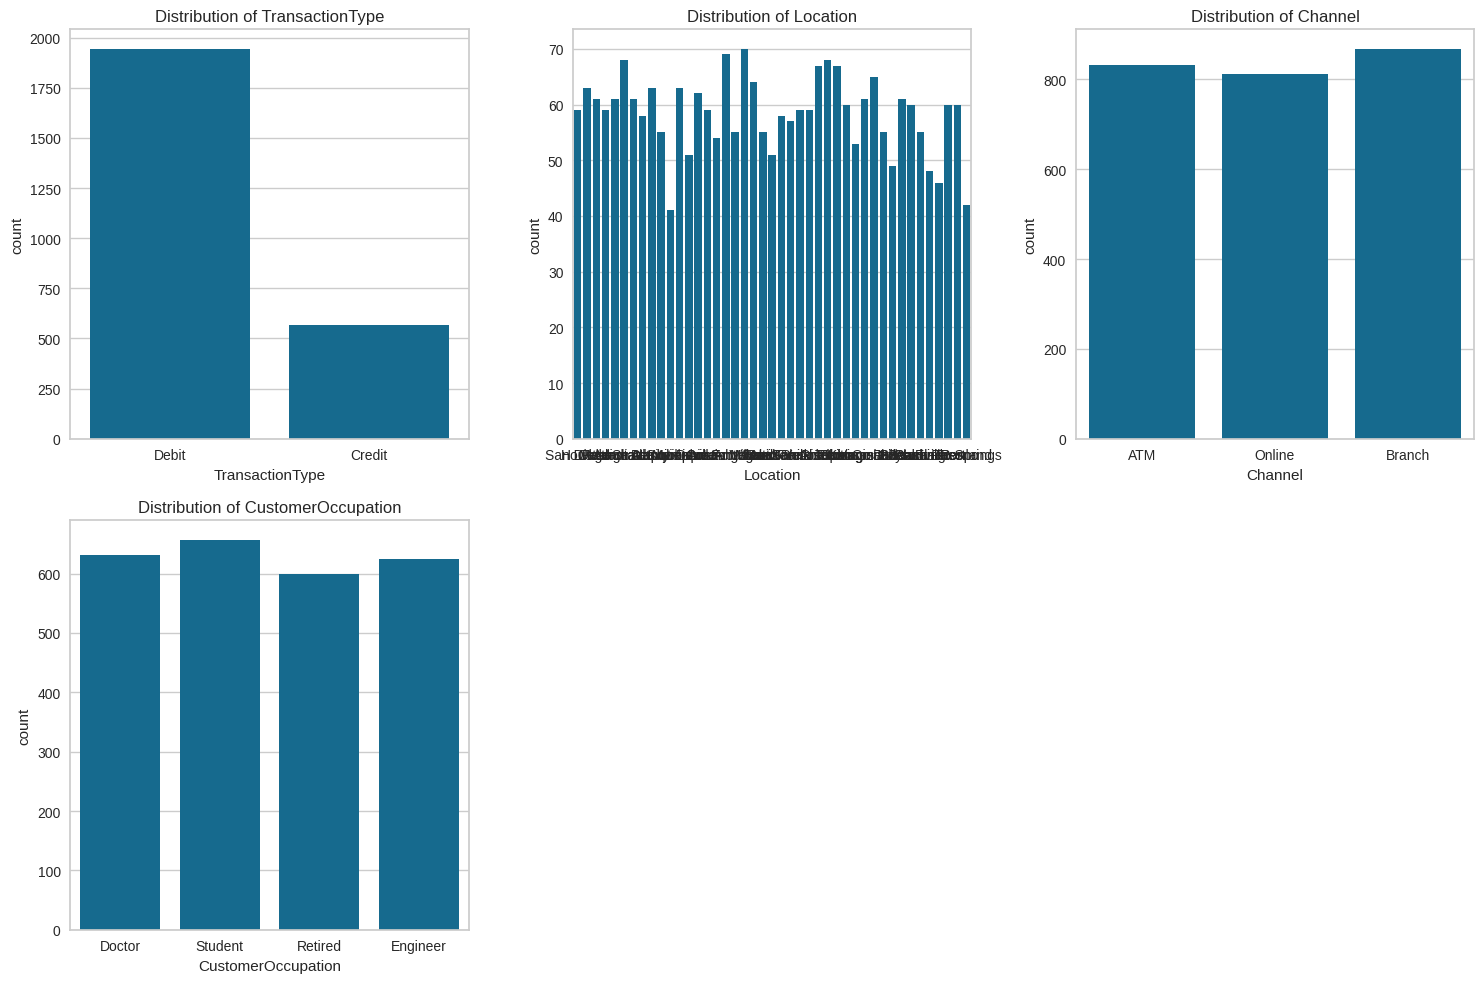

In [41]:
# Visualisasi distribusi data categorical untuk beberapa kolom
columns_categorical = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']

plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_categorical, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [42]:
# Menghapus atau Menangani Data Kosong (Missing Value)
df.isnull().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


In [43]:
# Menangani Data Duplikat
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


In [44]:
# Standarisasi fitur numerik menggunakan StandardScaler
scaler = StandardScaler()

# Melakukan scaling pada fitur penting
df[['TransactionAmount', 'TransactionDuration']] = scaler.fit_transform(df[['TransactionAmount', 'TransactionDuration']])

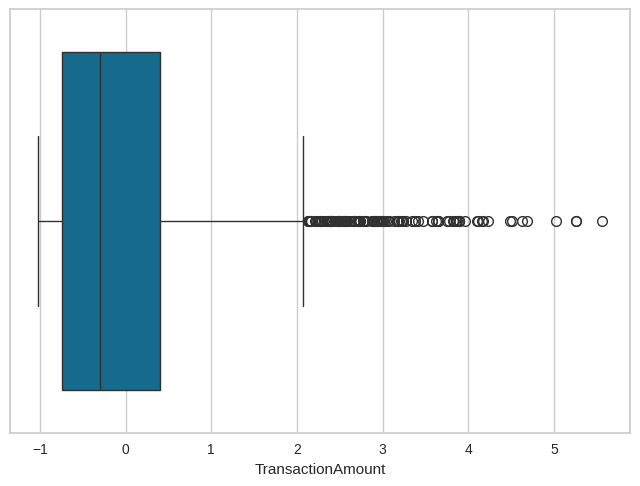

In [45]:
# Deteksi Outlier
x = np.random.normal(15, 5, 250)
sns.boxplot(x='TransactionAmount', data=df)
plt.show()

In [46]:
# Penanganan Outlier
for col in columns_numerical:
    # Melihat outlier dengan IQR (Interquartile Range)
    Q1 = df['TransactionAmount'].quantile(0.25)
    Q3 = df['TransactionAmount'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identifikasi outlier
    outliers = df[(df['TransactionAmount'] < lower_bound) | (df['TransactionAmount'] > upper_bound)]

    # Menghapus outlier dari DataFrame
    df = df.drop(outliers.index)

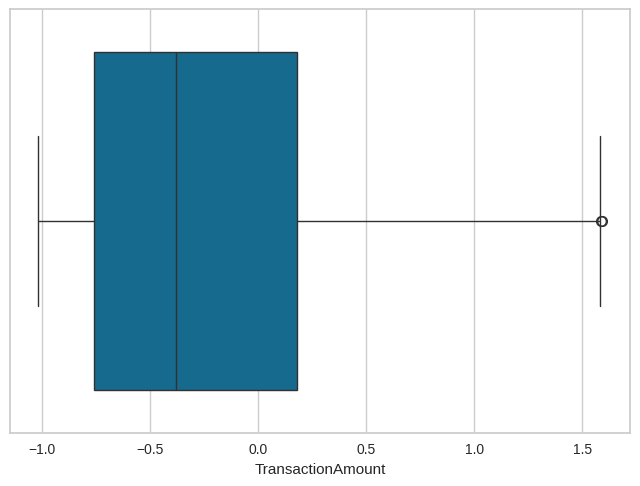

In [47]:
x = np.random.normal(15, 5, 250)
sns.boxplot(x='TransactionAmount', data=df)
plt.show()

In [48]:
# Encoding
df = pd.get_dummies(df, columns=['TransactionType', 'Channel'])

print(df)

     TransactionID AccountID  TransactionAmount      TransactionDate  \
0         TX000001   AC00128          -0.971275  2023-04-11 16:29:14   
1         TX000002   AC00455           0.269440  2023-06-27 16:44:19   
2         TX000003   AC00019          -0.586882  2023-07-10 18:16:08   
3         TX000004   AC00070          -0.387456  2023-05-05 16:32:11   
4         TX000005   AC00411          -0.973468  2023-10-16 17:51:24   
...            ...       ...                ...                  ...   
2506      TX002507   AC00258          -0.703536  2023-04-13 17:45:33   
2508      TX002509   AC00322          -0.157779  2023-03-22 17:36:48   
2509      TX002510   AC00095          -0.921462  2023-08-21 17:08:50   
2510      TX002511   AC00118          -0.382420  2023-02-24 16:24:46   
2511      TX002512   AC00009          -0.186763  2023-02-14 16:21:23   

          Location DeviceID      IP Address MerchantID  CustomerAge  \
0        San Diego  D000380  162.198.218.92       M015          

In [49]:
df.reset_index(drop=True, inplace=True)
print(df)

     TransactionID AccountID  TransactionAmount      TransactionDate  \
0         TX000001   AC00128          -0.971275  2023-04-11 16:29:14   
1         TX000002   AC00455           0.269440  2023-06-27 16:44:19   
2         TX000003   AC00019          -0.586882  2023-07-10 18:16:08   
3         TX000004   AC00070          -0.387456  2023-05-05 16:32:11   
4         TX000005   AC00411          -0.973468  2023-10-16 17:51:24   
...            ...       ...                ...                  ...   
2309      TX002507   AC00258          -0.703536  2023-04-13 17:45:33   
2310      TX002509   AC00322          -0.157779  2023-03-22 17:36:48   
2311      TX002510   AC00095          -0.921462  2023-08-21 17:08:50   
2312      TX002511   AC00118          -0.382420  2023-02-24 16:24:46   
2313      TX002512   AC00009          -0.186763  2023-02-14 16:21:23   

          Location DeviceID      IP Address MerchantID  CustomerAge  \
0        San Diego  D000380  162.198.218.92       M015          

In [51]:
data = ['TransactionType_Credit', 'TransactionType_Debit', 'Channel_ATM', 'Channel_Branch', 'Channel_Online']
df[data] = df[data].astype('int64')
print(df)

     TransactionID AccountID  TransactionAmount      TransactionDate  \
0         TX000001   AC00128          -0.971275  2023-04-11 16:29:14   
1         TX000002   AC00455           0.269440  2023-06-27 16:44:19   
2         TX000003   AC00019          -0.586882  2023-07-10 18:16:08   
3         TX000004   AC00070          -0.387456  2023-05-05 16:32:11   
4         TX000005   AC00411          -0.973468  2023-10-16 17:51:24   
...            ...       ...                ...                  ...   
2309      TX002507   AC00258          -0.703536  2023-04-13 17:45:33   
2310      TX002509   AC00322          -0.157779  2023-03-22 17:36:48   
2311      TX002510   AC00095          -0.921462  2023-08-21 17:08:50   
2312      TX002511   AC00118          -0.382420  2023-02-24 16:24:46   
2313      TX002512   AC00009          -0.186763  2023-02-14 16:21:23   

          Location DeviceID      IP Address MerchantID  CustomerAge  \
0        San Diego  D000380  162.198.218.92       M015          

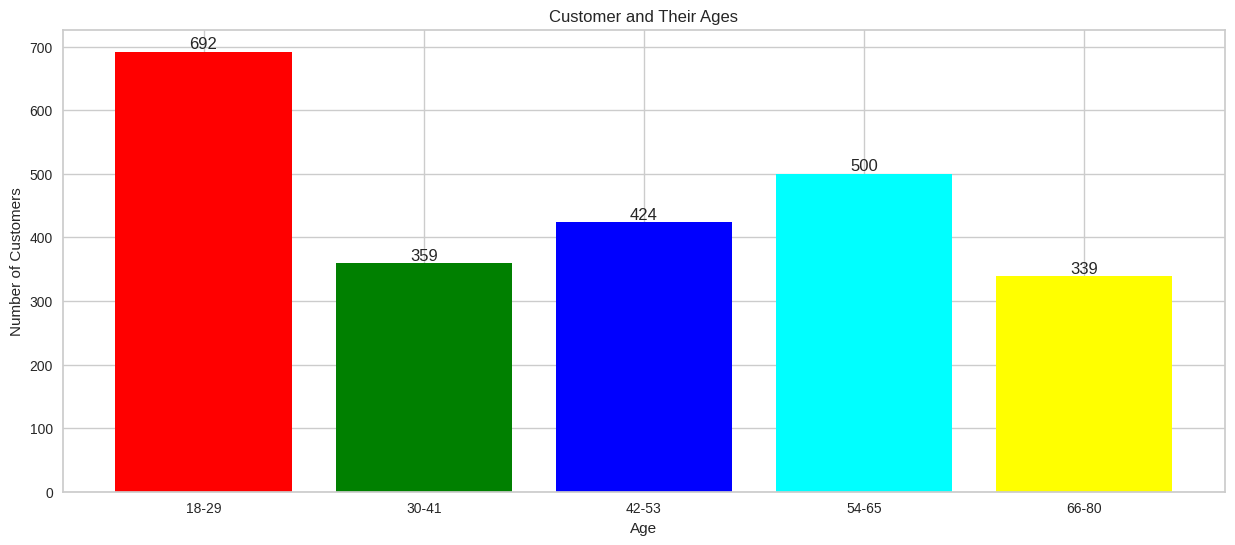

In [52]:
# Binning
df =df[(df.CustomerAge >= 18) & (df.CustomerAge <=80)]
# Mengelompokkan usia pelanggan ke dalam kategori dan menghitung jumlah pelanggan di setiap kategori
age18_29 = df.CustomerAge[(df.CustomerAge >= 18) & (df.CustomerAge <= 29)]
age30_41 = df.CustomerAge[(df.CustomerAge >= 30) & (df.CustomerAge <= 41)]
age42_53 = df.CustomerAge[(df.CustomerAge >= 42) & (df.CustomerAge <= 53)]
age54_65 = df.CustomerAge[(df.CustomerAge >= 54) & (df.CustomerAge <= 65)]
age66_80 = df.CustomerAge[(df.CustomerAge >= 66) & (df.CustomerAge <=80)]

# Menyusun data untuk plotting
x = ["18-29", "30-41", "42-53", "54-65", "66-80"]
y = [len(age18_29.values), len(age30_41.values), len(age42_53.values), len(age54_65.values), len(age66_80.values)]

# Membuat bar chart untuk distribusi usia pelanggan
plt.figure(figsize=(15, 6))
plt.bar(x, y, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title("Customer and Their Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customers")

# Menambahkan label jumlah pelanggan di atas setiap bar
for i in range(len(x)):
  plt.text(i, y[i], y[i], ha='center', va='bottom')

plt.show()

In [53]:
# Mengambil 5 fitur
X = df[['TransactionAmount', 'TransactionDuration', 'CustomerAge', 'TransactionType_Credit', 'TransactionType_Debit', 'Channel_ATM', 'Channel_Branch', 'Channel_Online']].values
print(pd.DataFrame(X, columns=['TransactionAmount', 'TransactionDuration', 'CustomerAge', 'TransactionType_Credit', 'TransactionType_Debit', 'Channel_ATM', 'Channel_Branch', 'Channel_Online']))

      TransactionAmount  TransactionDuration  CustomerAge  \
0             -0.971275            -0.552443         70.0   
1              0.269440             0.305314         68.0   
2             -0.586882            -0.909842         19.0   
3             -0.387456            -1.353017         26.0   
4             -0.973468             1.120184         26.0   
...                 ...                  ...          ...   
2309          -0.703536            -0.380892         60.0   
2310          -0.157779             0.819969         48.0   
2311          -0.921462             0.376794         56.0   
2312          -0.382420            -1.438793         23.0   
2313          -0.186763            -0.380892         24.0   

      TransactionType_Credit  TransactionType_Debit  Channel_ATM  \
0                        0.0                    1.0          1.0   
1                        0.0                    1.0          1.0   
2                        0.0                    1.0          0.

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

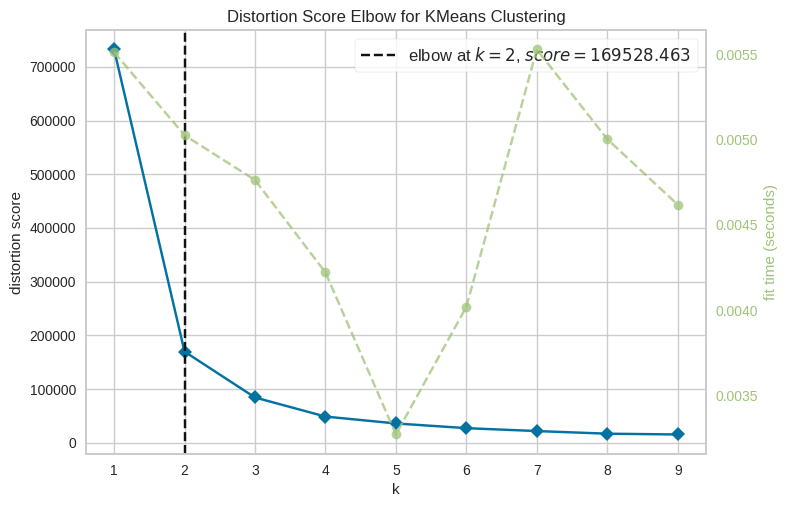

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [54]:
# Metode Elbow
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [55]:
# K-Means

# Inisialisasi dan melatih model KMeans dengan jumlah cluster = 2
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

# Mendapatkan label cluster
labels = kmeans.labels_

# Mendapatkan jumlah cluster
k = 2

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [56]:
# Evaluasi Model Clustering dengan Silhouette Score

X2 = df[['TransactionAmount', 'TransactionDuration', 'CustomerAge', 'Channel_ATM', 'Channel_Branch', 'Channel_Online', 'TransactionType_Credit', 'TransactionType_Debit']].iloc[: , :].values

silhouette_sc = []
best_n = -1
best_score = -1

for n in range(2,11):
     algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
     algorithm.fit(X2)
     silhouette_sc += [silhouette_score(X2 , algorithm.labels_)]
     print(f"Silhouette Score for {n} clusters : {silhouette_sc[-1]}")
     if silhouette_sc[-1] > best_score:
        best_score = silhouette_sc[-1]
        best_n = n

print(f"\nBest Number of Clusters : {best_n}")

Silhouette Score for 2 clusters : 0.6472247989813545
Silhouette Score for 3 clusters : 0.5724652781373784
Silhouette Score for 4 clusters : 0.5488610301207084
Silhouette Score for 5 clusters : 0.5064514404736017
Silhouette Score for 6 clusters : 0.4607227547050813
Silhouette Score for 7 clusters : 0.4573393292651123
Silhouette Score for 8 clusters : 0.44833757026715787
Silhouette Score for 9 clusters : 0.4288831083779151
Silhouette Score for 10 clusters : 0.41644658828535513

Best Number of Clusters : 2


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [57]:
#Visualisasi Hasil Clustering

model_kmeans = KMeans(n_clusters = best_n, init = 'k-means++', random_state = 42)
model_kmeans.fit(X2)
labels_pca = model_kmeans.labels_

pca = PCA(n_components=2)
components = pca.fit_transform(X2)

df_pca = pd.DataFrame(components, columns = ['PC1', 'PC2'])
df_pca['Cluster'] = labels_pca

fig = px.scatter(df_pca, x='PC1', y='PC2', color='Cluster', title='Visualisasi Hasil Clustering')
fig.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [58]:
data = df[['TransactionAmount', 'TransactionDuration', 'CustomerAge', 'TransactionType_Credit', 'TransactionType_Debit', 'Channel_ATM', 'Channel_Branch', 'Channel_Online']]
df_normalized = pd.DataFrame(data)

# Menambahkan label cluster
df_normalized['Cluster'] = model_kmeans.labels_

# Melakukan inverse untuk fitur categorical
df_normalized['TransactionType'] = df_normalized[['TransactionType_Credit', 'TransactionType_Debit']].idxmax(axis=1).str.replace('TransactionType_', '')
df_normalized['Channel'] = df_normalized[['Channel_ATM', 'Channel_Branch', 'Channel_Online']].idxmax(axis=1).str.replace('Channel_', '')

df_original = df_normalized.drop(columns=['TransactionType_Credit', 'TransactionType_Debit', 'Channel_ATM', 'Channel_Branch', 'Channel_Online'])

print(df_original)


      TransactionAmount  TransactionDuration  CustomerAge  Cluster  \
0             -0.971275            -0.552443           70        0   
1              0.269440             0.305314           68        0   
2             -0.586882            -0.909842           19        1   
3             -0.387456            -1.353017           26        1   
4             -0.973468             1.120184           26        1   
...                 ...                  ...          ...      ...   
2309          -0.703536            -0.380892           60        0   
2310          -0.157779             0.819969           48        0   
2311          -0.921462             0.376794           56        0   
2312          -0.382420            -1.438793           23        1   
2313          -0.186763            -0.380892           24        1   

     TransactionType Channel  
0              Debit     ATM  
1              Debit     ATM  
2              Debit  Online  
3              Debit  Online  
4   

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [59]:
# Melakukan inverse untuk data yang di standardisasi
df_original[['TransactionAmount', 'TransactionDuration']] = scaler.inverse_transform(df_original[['TransactionAmount', 'TransactionDuration']])

print(df_original)

      TransactionAmount  TransactionDuration  CustomerAge  Cluster  \
0                 14.09                 81.0           70        0   
1                376.24                141.0           68        0   
2                126.29                 56.0           19        1   
3                184.50                 25.0           26        1   
4                 13.45                198.0           26        1   
...                 ...                  ...          ...      ...   
2309              92.24                 93.0           60        0   
2310             251.54                177.0           48        0   
2311              28.63                146.0           56        0   
2312             185.97                 19.0           23        1   
2313             243.08                 93.0           24        1   

     TransactionType Channel  
0              Debit     ATM  
1              Debit     ATM  
2              Debit  Online  
3              Debit  Online  
4   

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [61]:
# Analisis Karakteristik

def analyze_clusters(df_original, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        # Mengambil data untuk cluster saat ini
        cluster_data = df_original[df_original['Cluster'] == cluster_id]

        # Menghitung rata-rata untuk setiap fitur dalam cluster
        mean_transaction_amount = cluster_data['TransactionAmount'].mean()  # Rata-rata Transaction Amount
        mean_transaction_duration = cluster_data['TransactionDuration'].mean()  # Rata-rata Transaction Duration
        mean_customer_age = cluster_data['CustomerAge'].mean() # Rata-rata Customer Age
        mode_transaction_type = cluster_data['TransactionType'].mode()[0] # Modus Transaction Type
        mode_channel = cluster_data['Channel'].mode()[0] # Modus Channel

        print(f"\nCluster {cluster_id + 1}:")
        print(f"Rata-rata Transaction Amount : {mean_transaction_amount:.2f}")
        print(f"Rata-rata Transaction Duration: {mean_transaction_duration:.2f}")
        print(f"Rata-rata Customer Age: {mean_customer_age:.2f}")
        print(f"Nilai sering muncul pada Transaction Type: {mode_transaction_type}")
        print(f"Nilai sering muncul pada Channel: {mode_channel}")

# Analisis karakteristik setiap cluster
analyze_clusters(df_original, k)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata Transaction Amount : 228.96
Rata-rata Transaction Duration: 118.81
Rata-rata Customer Age: 60.05
Nilai sering muncul pada Transaction Type: Debit
Nilai sering muncul pada Channel: ATM

Cluster 2:
Rata-rata Transaction Amount : 239.48
Rata-rata Transaction Duration: 120.08
Rata-rata Customer Age: 28.86
Nilai sering muncul pada Transaction Type: Debit
Nilai sering muncul pada Channel: Branch


In [62]:
feature_numerical = df_original.groupby(['Cluster']).agg({
    'TransactionAmount': ['mean', 'min', 'max'],
    'TransactionDuration': ['mean', 'min', 'max'],
    'CustomerAge': ['mean', 'min', 'max'],
    })
print(feature_numerical)

        TransactionAmount               TransactionDuration               \
                     mean   min     max                mean   min    max   
Cluster                                                                    
0              228.958989  0.84  760.53          118.814783  10.0  299.0   
1              239.477045  0.26  761.73          120.075638  10.0  300.0   

        CustomerAge          
               mean min max  
Cluster                      
0         60.050127  45  80  
1         28.855761  18  44  


Tulis hasil interpretasinya di sini.
1. Cluster 1: Cluster 1 didapatkan karena TransactionAmount memiliki nilai rata-rata 228.96 dengan batas minimum 0.84 dan batas maksimum 760.53. Untuk TransactionDuration memiliki nilai rata-rata 118.81 dengan batas minimum 10 dan batas maksimum 299. Untuk CustomerAge memiliki nilai rata-rata 60.05 dengan nilai minimum 45 tahun dan batas maksimum 80 tahun. Lalu, TransactionType memiliki nilai modus yaitu Debit dan untuk Channel memiliki nilai modus yaitu ATM.

2. Cluster 2: Cluster 2 didapatkan karena TransactionAmount memiliki nilai rata-rata 239.48 dengan batas minimum 0.26 dan batas maksimum 761.73. Untuk TransactionDuration memiliki nilai rata-rata 120.08 dengan batas minimum 10 dan batas maksimum 300. Untuk CustomerAge memiliki nilai rata-rata 28.86 dengan nilai minimum 18 tahun dan batas maksimum 44 tahun. Lalu, TransactionType memiliki nilai modus yaitu Debit dan untuk Channel memiliki nilai modus yaitu Branch.

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [63]:
# Mengambil Kolom yang Akan Digunakan
df_onehot = df[['TransactionType_Credit', 'TransactionType_Debit', 'Channel_ATM', 'Channel_Branch', 'Channel_Online']]
df_numerical = df_original[['TransactionAmount', 'TransactionDuration', 'CustomerAge', 'Cluster']]

df_selected = pd.concat([df_numerical, df_onehot], axis=1)

In [64]:
# Mengatur Kolom dan Menyimpan Hasilnya
df_classification = df_selected[['TransactionAmount', 'TransactionDuration', 'CustomerAge', 'TransactionType_Credit', 'TransactionType_Debit', 'Channel_ATM', 'Channel_Branch', 'Channel_Online', 'Cluster']]

df_classification.to_csv("hasil_clustering.csv", index=False)